In [1]:
%load_ext autoreload
%autoreload 2

In [12]:
import re
from os.path import join, basename, dirname
from glob import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from natsort import natsorted
import torch

from torchvision.io import read_image

In [4]:
from experiment_utils import set_env, REPO_PATH, seed_everything
set_env()

In [5]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
})

In [77]:
paths = glob(join(REPO_PATH, "experiments/results", "*_gradcam_iou.pth"))

df = pd.DataFrame(None, columns=["dataset", "model", "iou"], index=list(range(6)))
# flat_df = pd.DataFrame(None, columns=["dataset", "model", "iou"])
flat_df = []

for i, path in enumerate(paths):
    output = torch.load(path)
    all_outputs = [output[i] for i in output if i != "overall"]
    elements = basename(path).split(".pth")[0].split("_")
    
    idx = elements.index("MNIST")
    dataset = " ".join(elements[:idx + 1])
    model_type = "Original" if not "counterfactual" in elements else "Counterfactual"
    iou = output["overall"]
    df.at[i, "dataset"] = dataset
    df.at[i, "model"] = model_type
    df.at[i, "iou"] = iou
    
    flat_df.append([dataset, model_type, iou])

flat_df = pd.DataFrame(flat_df, columns=["dataset", "model", "iou"])

In [78]:
flat_df = df.melt(id_vars=["iou", "model"])

In [79]:
df

,dataset,model,iou
0,colored MNIST,Original,0.436745
1,colored MNIST,Counterfactual,0.454287
2,double colored MNIST,Original,0.373542
3,wildlife MNIST,Original,0.388386
4,wildlife MNIST,Counterfactual,0.441846
5,double colored MNIST,Counterfactual,0.426295


In [80]:
flat_df

,iou,model,variable,value
0,0.436745,Original,dataset,colored MNIST
1,0.454287,Counterfactual,dataset,colored MNIST
2,0.373542,Original,dataset,double colored MNIST
3,0.388386,Original,dataset,wildlife MNIST
4,0.441846,Counterfactual,dataset,wildlife MNIST
5,0.426295,Counterfactual,dataset,double colored MNIST


In [81]:
df

,dataset,model,iou
0,colored MNIST,Original,0.436745
1,colored MNIST,Counterfactual,0.454287
2,double colored MNIST,Original,0.373542
3,wildlife MNIST,Original,0.388386
4,wildlife MNIST,Counterfactual,0.441846
5,double colored MNIST,Counterfactual,0.426295


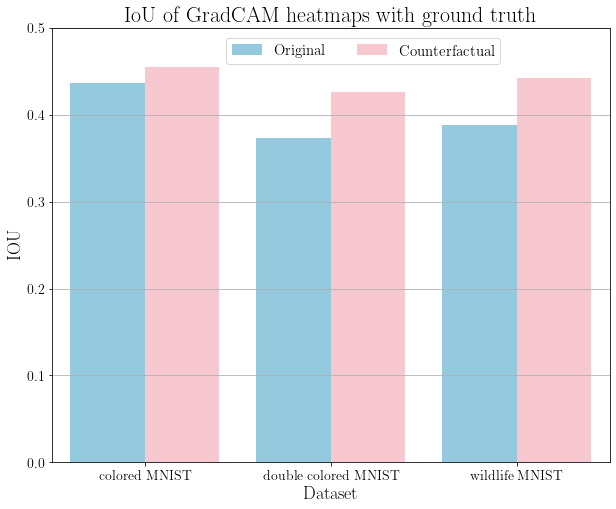

In [98]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
ax.grid()
ax.set_title("IoU of GradCAM heatmaps with ground truth", fontsize=22)

# sns.barplot(data=df, x="dataset", y="iou", hue="model", palette="Paired")
sns.barplot(data=df, x="dataset", y="iou", hue="model", palette=["skyblue", "pink"])


ax.legend(bbox_to_anchor=(0.3, 0.9), fontsize=15, ncol=2)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_xlabel(ax.get_xlabel().capitalize(), fontsize=18)
ax.set_ylabel(ax.get_ylabel().upper(), fontsize=18)
ax.set_ylim(0, 0.5)

plt.savefig(join(REPO_PATH, "experiments", "results", "quant_gradcam_iou.pdf"), bbox_inches="tight")
plt.show()

In [28]:
df.floordiv

,dataset,model,iou
0,colored MNIST,Original,0.436745
1,colored MNIST,Counterfactual,0.454287
2,double colored MNIST,Original,0.373542
3,wildlife MNIST,Original,0.388386
4,wildlife MNIST,Counterfactual,0.441846
5,double colored MNIST,Counterfactual,0.426295


In [21]:
elements

['double',
 'colored',
 'MNIST',
 'classifier',
 'double',
 'colored',
 'MNIST',
 'counterfactual',
 'gradcam',
 'iou']

In [7]:
outputs

['/home/lcur0478/anonymous/projects/fact-team3/experiments/results/colored_MNIST_classifier_colored_MNIST_gradcam_iou.pth',
 '/home/lcur0478/anonymous/projects/fact-team3/experiments/results/colored_MNIST_classifier_colored_MNIST_counterfactual_gradcam_iou.pth',
 '/home/lcur0478/anonymous/projects/fact-team3/experiments/results/double_colored_MNIST_classifier_double_colored_MNIST_gradcam_iou.pth',
 '/home/lcur0478/anonymous/projects/fact-team3/experiments/results/wildlife_MNIST_classifier_wildlife_MNIST_gradcam_iou.pth',
 '/home/lcur0478/anonymous/projects/fact-team3/experiments/results/wildlife_MNIST_classifier_wildlife_MNIST_counterfactual_gradcam_iou.pth',
 '/home/lcur0478/anonymous/projects/fact-team3/experiments/results/double_colored_MNIST_classifier_double_colored_MNIST_counterfactual_gradcam_iou.pth']

In [11]:
output

{0: 0.4283553815393227,
 1: 0.4101100720857319,
 2: 0.4050119727548927,
 3: 0.4184620385031098,
 4: 0.4597989428686101,
 5: 0.4167461124274249,
 6: 0.42546644871582534,
 7: 0.45312852772004014,
 8: 0.42572650588066774,
 9: 0.4182301341681029,
 'overall': 0.4262953}